# Ampel
### Aufgabenstellung

Ein Kraftfahrzeug nähert sich einer Verkehrsampel mit verminderter Geschwindigkeit. Beim Umschalten der Ampel auf Grün wird das KFZ während der Zeit $t_{1}$ gleichmäßig mit $a$ beschleunigt und legt dabei die Wegstrecke $s_{1}$ zurück.\
Wie groß sind die Geschwindigkeiten $v_{0}$ und $v_{1}$ am Anfang und am Ende der Beschleunigungsphase?

### Gegeben
- Beschleunigung $a = 0,94~\frac{m}{s²}$
- Zeit $t_{1} = 5,3~s$
- Wegstrecke $s_{1} = 60~m$

### Gesucht
Geschwindigkeit in Metern pro Sekunde [$\frac{m}{s}$] 
1. $v_{0}$
2. $v_{1}$

### Skizze

![title](Skizzen/Skizze_Ampel.png)

### Physikalischer Lösungsweg
Für die Berechnung von $v_{0}$ und $v_{1}$ benötigen wir das Weg-Zeit-Gesetz für die gleichförmig beschleunigte Bewegung:

$ s(t) = \frac{a}{2} \cdot{} t^2 + v_0 \cdot{} t + s_0 \;\;| s_0 = 0$

$ s_1(t) = \frac{a}{2} \cdot{} t_{1}^2 + v_0 \cdot{} t_1 $

Dadurch ergeben sich für $v_{0}$ und $v_{1}$ folgende Formeln: 

$ v_{0} = \frac{s_{1}}{t_{1}} -\frac{a}{2} \cdot{}t_{1}$

$ v(t) = a \cdot{} t + v_{0}$

$ v_1(t) = a \cdot{} t + \frac{s_{1}}{t_{1}} -\frac{a}{2} \cdot{}t_{1}$

Berechnung $v_0$:

$v_{0}(t_{1}) = \frac{60~m}{5,3~s} - \frac{1}{2}\cdot 0,94 \frac{m}{s^2} \cdot 5,3~s  = 8,83~\frac{m}{s}  ≈ 32~\frac{km}{h}$

Berechnung $v$ mithilfe der zuvor bestimmten Geschwindigkeit $v_0$:

$v_{1}(t_{1}) = 0,94 \frac{m}{s^2} \cdot 5,3~s+ 8,83~\frac{m}{s^2} = 13,81~\frac{m}{s} ≈ 50~\frac{km}{h}$

Berechnung $v$ ohne vorher bestimmte Geschwindigkeit $v_0$:

$v_{1}(t_{1}) = 0,94 \frac{m}{s^2} \cdot 5,3~s + \frac{60~m}{5,3~s} - \frac{1}{2} \cdot 0,94 \frac{m}{s^2} \cdot 5,3~s = 13,81~\frac{m}{s} ≈ 50~\frac{km}{h}$

### Implemetierung in Python
Zuerst müssen einige Bibliotheken importiert werden, die für Berechnungen, Visualisierung, etc. notwendig sind.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

Nun können für die oben gezeigten Formeln durch PyVo-Funktionen definiert werden, mit denen im Anschluss die Ergebnisse für z.B. $v_0$ und $v_1$ berechnet werden können.

In [2]:
# Funktion zur Berechnung von v0
def berechne_v0(a, t, s):
    return (s/t) - (0.5*a*t)

# Funktion zur Berechnung von v1
def berechne_v1(a, t, s):
    return (a * t) + (s/t) - (0.5*a*t)

# allgemeine Funktion zur Berechnung der Geschwindigkeit v
def berechne_v(a,t, v0):
    return (a * t) + v0

# allgemeine Funktion zur Berechnung des Weges s
def berechne_s(v0, t, a):
    return (v0 * t) + ((a/2) * t**2)

Nachdem die Formeln definiert wurden, können nun die gegebenen Werte als Variablen definiert werden, diese der Funktion übergeben und die Ergebnisse direkt ausgeben werden. 

In [3]:
# Variablen definieren
a = 0.94 # m/s²
t = 5.3  # s
s = 60   # m

# Funktionsaufruf zur Berechnung von v0
v0 = berechne_v0(a, t, s)
# Ausgabe des Ergebnisses unter Beachtung der signifikanten Stellen der Eingabeparameter (hier 2)
print(f"v0 = {round(v0,2)} m/s")

# Funktionsaufruf zur Berechnung von v1 ohne v0 zu kennen.
v1 = berechne_v1(a, t, s)
print(f"v1 = {round(v1,2)} m/s (Rechenweg 1, ohne vorher bestimmte Geschwindigkeit v0)")

# Funktionsaufruf zur Berechnung von v1 mithilfe des zuvor bestimmten v0.
v1 = berechne_v(a, t, v0)
print(f"v1 = {round(v1,2)} m/s (Rechenweg 2, mithilfe der zuvor bestimmten Geschwindigkeit v0)")

v0 = 8.83 m/s
v1 = 13.81 m/s (Rechenweg 1, ohne vorher bestimmte Geschwindigkeit v0)
v1 = 13.81 m/s (Rechenweg 2, mithilfe der zuvor bestimmten Geschwindigkeit v0)


### Graphische Darstellung
Nun können die Zusammenhänge der gleichmäßig beschleunigten Bewegung für die gegebenen Parameter visualisiert werden. Hierfür werden für definierte Zeitschritt die Beschleunigung $a$, die Geschwindigkeit $v$ und zurückgelegte Wegstrecke $s$ abhängig von $t$ bestimmt.\
Der folgende Code berechnet Beschleunigung, Geschwindigkeit und Weg für die gegebenen Werte: 

Beschleunigung $a_0 = 0,94~\frac{m}{s²}$\
benötigte Zeit $t = 5,3~s$\
zurückgelegter Weg $s_1 = 60~m$ nach zurückgelegter Zeit $t$

In [4]:
# Definition der Startparameter
a0 = 0.94 # m/s^2
weg = 60 # m
t_gesamt = 5.3 #s

# Hier definieren wir einen Beobachtungszeitraum, der die über die 5.3s hinaus geht und definieren dabei automatisch t0 und t1.
zeitschritte = np.arange(0,t_gesamt*2,0.1).round(1)
t1 = round(((t_gesamt*2) - (t_gesamt/2)),1)
t0 = round(t_gesamt/2, 1)

# Nun definieren wir eine Tabelle, in der wir die gemessenen Werte erfassen.
messwerte = []

# Initialisieren der Variablen und Berechnung von v0.
v0 = berechne_v0(a0, t_gesamt, weg)
s = 0
a = 0
for t in zeitschritte:
    # da nur zwischen t0 und t1 beschleunigt wird, ist die Beschleunigung 
    # nur zwischen t0 und t1 gleich der gegebenen Beschleunigung und ansonsten 0.
    if (t >= t0) and (t <= t1):
        a = a0
        v0 = berechne_v(a,0.1,v0) # 0.1 ist Δt
        s = s + berechne_s(v0,0.1,a) # s in Δs
        messwerte.append([t-t_gesamt/2, a, v0, s]) # Hier fügen wir die aktuelle Beobachtung unseren Messwerten hinzu
    else:
        a = 0 # außerhalb von t0 und t1 wird nicht beschleunigt.
        s = s + berechne_s(v0,0.1,a)
        messwerte.append([t-t_gesamt/2, a, v0, s])
        
#Als letztes werden die Messwerte in ein Pandas DataFrame konvertiert. Das macht die Visualisierung einfacher.
tabelle = pd.DataFrame(messwerte, columns=['time', 'a', 'v', 's'])   
tabelle.head()

,time,a,v,s
0,-2.65,0.0,8.829755,0.882975
1,-2.55,0.0,8.829755,1.765951
2,-2.45,0.0,8.829755,2.648926
3,-2.35,0.0,8.829755,3.531902
4,-2.25,0.0,8.829755,4.414877


### Graphische Darstellung der physikalischen Lösung
Nun können Beschleunigung, Geschwindigkeit und Wegstrecke in Abhängigkeit von der Zeit graphisch dargestellt werden:

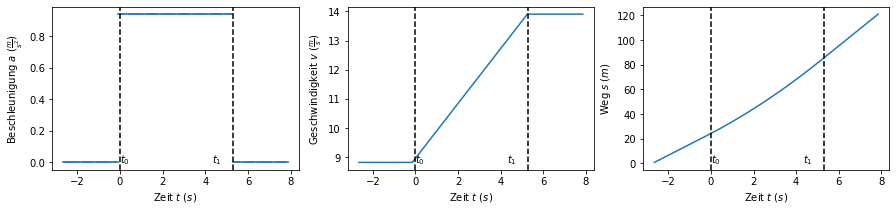

In [5]:
fig, axs = plt.subplots(1, 3, figsize=(15,3))      
# Zeichnen der Verläufe
axs[0].scatter(tabelle['time'], tabelle['a'], s=10, marker="_")
axs[1].plot(tabelle['time'], tabelle['v'], linestyle="-")
axs[2].plot(tabelle['time'], tabelle['s'], linestyle="-")

# Einstellungen des Plots
axs[0].set_ylabel(r"Beschleunigung $\mathit{a}$ ($\frac{m}{s^2}$)")
axs[0].set_xlabel(r"Zeit $\mathit{t}$ (${s}$)")
axs[0].axvline(x=0, ymin=0, ymax=1, color='#000000', linestyle='--')
axs[0].axvline(x=t_gesamt, ymin=0, ymax=1, color='#000000', linestyle='--')
axs[0].text(0,min(tabelle['a']),r"$t_0$")
axs[0].text(t_gesamt-1,min(tabelle['a']),r"$t_1$")
axs[1].set_ylabel(r"Geschwindigkeit $\mathit{v}$ ($\frac{m}{s}$)")
axs[1].set_xlabel(r"Zeit $\mathit{t}$ (${s}$)")
axs[1].axvline(x=0, ymin=0, ymax=1, color='#000000', linestyle='--')
axs[1].axvline(x=t_gesamt, ymin=0, ymax=14, color='#000000', linestyle='--')
axs[1].text(0,min(tabelle['v']),r"$t_0$")
axs[1].text(t_gesamt-1,min(tabelle['v']),r"$t_1$")
axs[2].set_ylabel(r"Weg $\mathit{s}$ ($m$)")
axs[2].set_xlabel(r"Zeit $\mathit{t}$ (${s}$)")
axs[2].axvline(x=0, ymin=0, ymax=120, color='#000000',linestyle='--')
axs[2].axvline(x=t_gesamt, ymin=0, ymax=120, color='#000000',linestyle='--')
axs[2].text(0,min(tabelle['s']),r"$t_0$")
axs[2].text(t_gesamt-1,min(tabelle['s']),r"$t_1$")
plt.show()

### Graphische Darstellung unter Variation der Anfangsbedingung
Der Vorteil einer Programmiersprache wie Python ist es, dass die gegebenen Werte verändert oder auch die Geschwindigkeiten für mehrere Startparameter berechnet werden können. In folgendem Beispiel werden verschiedene Beschleunigungen $a_{0,i}$ gegeben und dabei die Geschwindigkeiten $v$ sowie die zurückgelegten Wegstrecken $s$ bestimmt.

Als erstes erfolgt die Definition verschiedener Beschleunigungen.

In [6]:
# Definition verschiedener Beschleunigungen
a0_vektor = [0.94, 1.94, 2.94, 3.94, 4.94]
# a0_vektor = np.arange(0.94, 4, 1)
# Der Zurückgelgte Weg und die Zeit sollen gleich bleiben
weg = 60 # m
t_gesamt = 5.3 #s
# Anhand der Zeit ergeben sich t0 und t1
zeitschritte = np.arange(0,t_gesamt*2,0.1).round(1)
t1 = round((t_gesamt*2) - (t_gesamt/2),1)
t0 = round(t_gesamt/2, 1)

Jetzt können in einer Schleife für verschiedene Beschleunigungen $a$ alle Geschwindigkeiten $v$ und Wegstrecken $s$ in Abhängigkeit von der Zeit $t$ bestimmt werden: 

In [7]:
# Definition einer Messwerttabelle
messwerte2 = []

# Jetzt wird durch die Iteration des a0_vektors für alle a_0 die Geschwindigkeit, Weg und v0 berechnet.
for a0_i in a0_vektor:
    v0 = berechne_v0(a0_i, t_gesamt, weg)
    s = 0
    a = 0
    for t in zeitschritte:
        if (t >= t0) and (t <= t1):
            a = a0_i
            v0 = berechne_v(a,0.1,v0)
            s = s + berechne_s(v0,0.1,a)
            messwerte2.append([t-t_gesamt/2, a, v0, s, a0_i])
        else:
            a = 0
            s = s + berechne_s(v0,0.1,a)
            messwerte2.append([t-t_gesamt/2, a, v0, s, a0_i])

tabelle2 = pd.DataFrame(messwerte2, columns=['time', 'a', 'v', 's', 'a0_i'])
tabelle2

,time,a,v,s,a0_i
0,-2.65,0.0,8.829755,0.882975,0.94
1,-2.55,0.0,8.829755,1.765951,0.94
2,-2.45,0.0,8.829755,2.648926,0.94
3,-2.35,0.0,8.829755,3.531902,0.94
4,-2.25,0.0,8.829755,4.414877,0.94
...,...,...,...,...,...
525,7.45,0.0,24.905755,115.323498,4.94
526,7.55,0.0,24.905755,117.814074,4.94
527,7.65,0.0,24.905755,120.304649,4.94
528,7.75,0.0,24.905755,122.795225,4.94


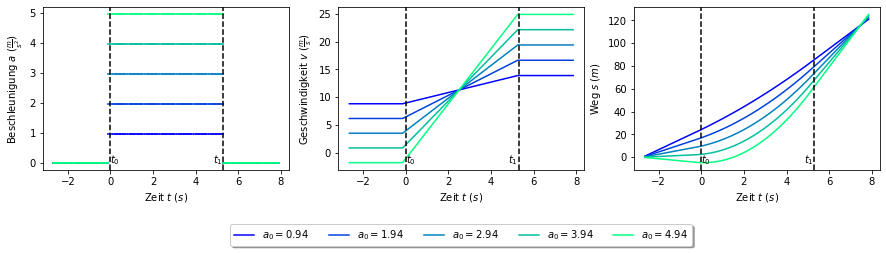

In [8]:
# Für die Visualsierung werden nun die verschiedenen Messungen bei unterschiedlichen a0 anhand von a0 gruppiert
groups = tabelle2.groupby("a0_i") 

# Definition einer Farbpalette 
col_pal = plt.get_cmap('winter', len(a0_vektor))

# Initialisieren einer Zählvariable
i = -1

fig, axs = plt.subplots(1, 3, figsize=(15,3))
# Iteration der a0 Gruppen und anschließende Visualsierung der Zeitverläufe
for name, group in groups:
    i = i+1
    axs[0].scatter(group['time'], group['a'], s=10, marker="_", color=col_pal(i))
    axs[1].plot(group['time'], group['v'], linestyle="-", color=col_pal(i), label = f"$a_0 = ${name}")
    axs[2].plot(group['time'], group['s'], linestyle="-", color=col_pal(i))

# Definition von Ploteigenschaften    
axs[0].set_ylabel(r"Beschleunigung $\mathit{a}$ ($\frac{m}{s^2}$)")
axs[0].set_xlabel(r"Zeit $\mathit{t}$ (${s}$)")
axs[0].axvline(x=0, ymin=0, ymax=1, color='#000000', linestyle='--')
axs[0].axvline(x=t_gesamt, ymin=0, ymax=1, color='#000000', linestyle='--')
axs[0].text(0,min(tabelle2['a']),r"$t_0$")
axs[0].text(t_gesamt-0.5,min(tabelle2['a']),r"$t_1$")
axs[1].set_ylabel(r"Geschwindigkeit $\mathit{v}$ ($\frac{m}{s}$)")
axs[1].set_xlabel(r"Zeit $\mathit{t}$ (${s}$)")
axs[1].axvline(x=0, ymin=0, ymax=1, color='#000000', linestyle='--')
axs[1].axvline(x=t_gesamt, ymin=0, ymax=14, color='#000000', linestyle='--')
axs[1].text(0,min(tabelle2['v']),r"$t_0$")
axs[1].text(t_gesamt-0.5,min(tabelle2['v']),r"$t_1$")
axs[2].set_ylabel(r"Weg $\mathit{s}$ ($m$)")
axs[2].set_xlabel(r"Zeit $\mathit{t}$ (${s}$)")
axs[2].axvline(x=0, ymin=0, ymax=120, color='#000000',linestyle='--')
axs[2].axvline(x=t_gesamt, ymin=0, ymax=120, color='#000000',linestyle='--')
axs[2].text(0,min(tabelle2['s']),r"$t_0$")
axs[2].text(t_gesamt-0.5,min(tabelle2['s']),r"$t_1$")
#axs[1].legend(frameon=False, handlelength=0.75, fontsize='large', facecolor='#ffffff') 
axs[1].legend(loc='upper center', bbox_to_anchor=(0.5, -0.3),fancybox=True, shadow=True, ncol=len(a0_vektor))
plt.show()